![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [2]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


### Handle missing values (if any)

In [ ]:
print("Missing Values:")
print(penguins_df.isnull().sum())  # Check for missing values

Missing Values:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Utilize your unsupervised learning skills to clusters in the penguins dataset!

Import, investigate and pre-process the "penguins.csv" dataset.
Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [4]:
df = penguins_df.copy()
df['sex'] = df['sex'].map({'MALE':1, 'FEMALE':0})

In [5]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# from sklearn.manifold import TSNE
# tsne = TSNE(learning_rate=25)

# features = tsne.fit_transform(df)
# sns.scatterplot(x=features[:,0], y=features[:,1], hue=df.sex)
# plt.show()

# features = tsne.fit_transform(df)
# sns.scatterplot(x=features[:,0], y=features[:,1], hue=df.body_mass_g)
# plt.show()

### Perform Hierarchical Clustering

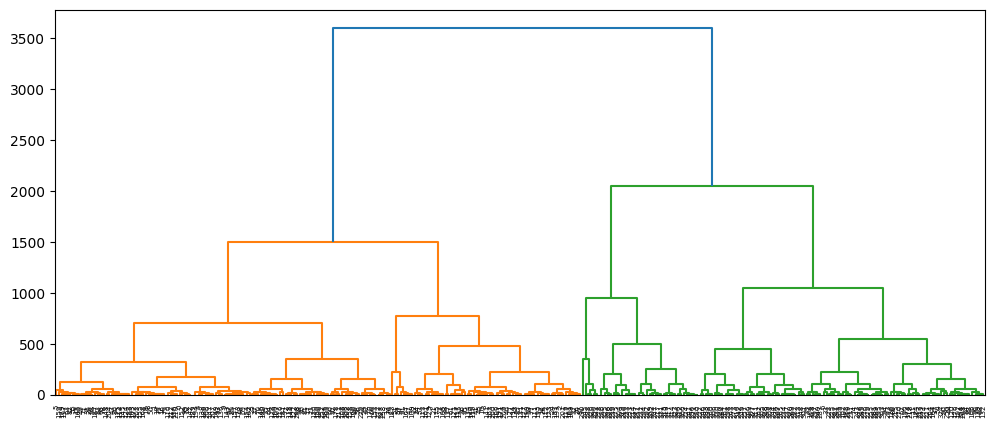

In [ ]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linkage = linkage(df, method='complete')
plt.figure(figsize=(12,5))
dendrogram(linkage)
plt.show()

labels = fcluster(linkage, 1400, criterion='distance')  #  Assign cluster labels from hierarchical clustering

###  Perform PCA for Dimensionality Reduction & Visualize PCA Components

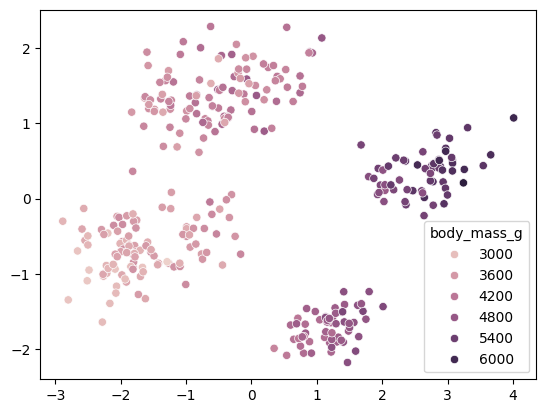

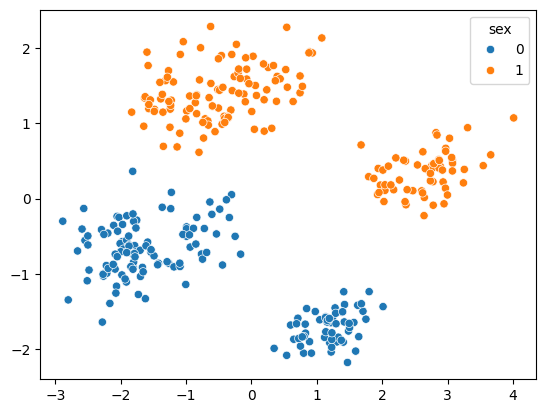

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()

pipe = make_pipeline(scaler, pca)
pca_features = pipe.fit_transform(df)


sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=df.body_mass_g)
plt.show()

sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=df.sex)
plt.show()

- > Mostly 4 types or 2

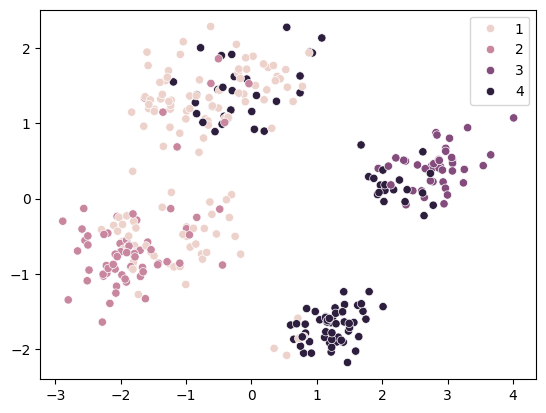

In [8]:
labels = fcluster(linkage, 1400, criterion='distance')
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=labels)
plt.show()

In [9]:
pca.explained_variance_ratio_

array([0.56820593, 0.28153159, 0.09633697, 0.03399271, 0.01993278])

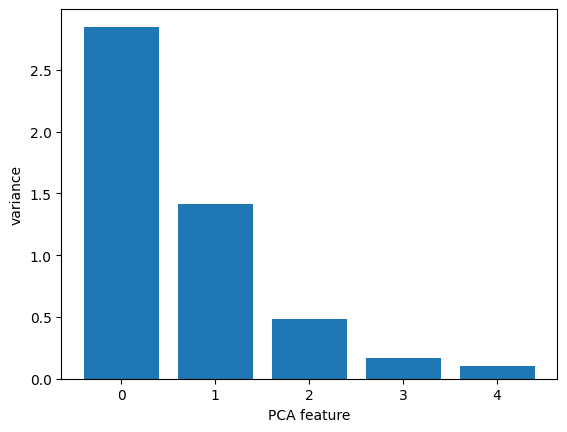

In [10]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


### Determine the Optimal Number of Clusters (Elbow Method)

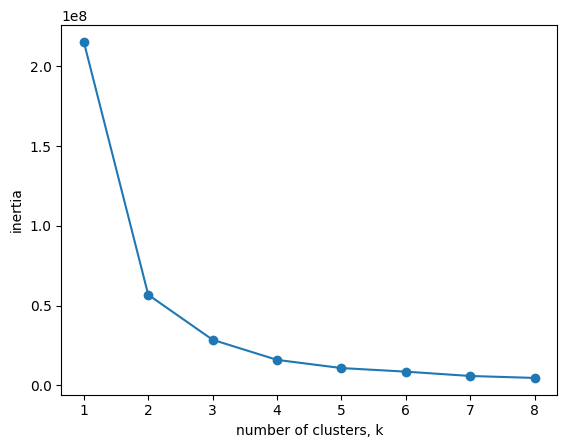

In [11]:
ks = range(1, 9)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


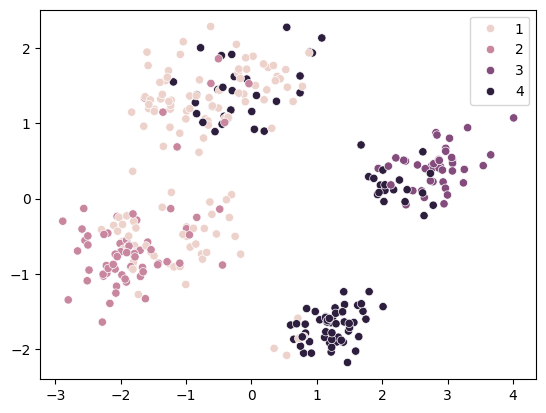

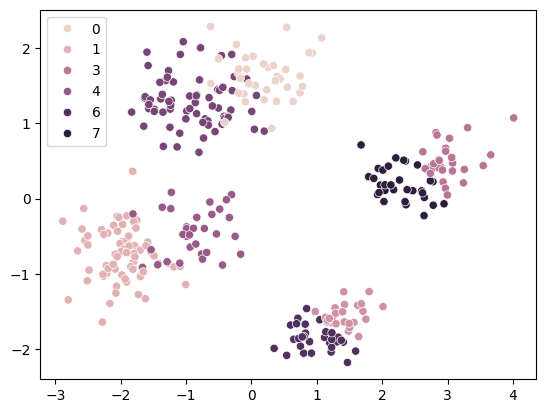

In [ ]:
labels = fcluster(linkage, 1400, criterion='distance') # repeated
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=labels)
plt.show()

labels2= model.fit_predict(scaler.fit_transform(df))   # visualize according to KMeans clusters
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=labels2)
plt.show()

### Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [ ]:
# Apply KMeans Clustering with Chosen k

df.drop('sex', axis=1, inplace=True)

df_scaled = scaler.fit_transform(df)
model = KMeans(4)
labels = model.fit_predict(df_scaled)

df['cluster'] = labels+1

# Compute Summary Statistics for Each Cluster

stat_penguins = df.groupby(labels).mean()